In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re

from sklearn.decomposition import PCA, SparsePCA,TruncatedSVD
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
from pymongo import MongoClient
import re

from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


%matplotlib inline

In [93]:
city = 'Seattle'
state = 'WA'
client = MongoClient('localhost', 27017)
db = client['neighborhood_recommender']
collection = db['crime' + '_' + city + '_' + state]
cursor = collection.find()
data = [crime for crime in cursor]
df = pd.DataFrame(data)
counts = df.groupby(['hood','summarized_offense_description'])['offense_type'].count()
df = pd.DataFrame(counts).reset_index()
df = df.pivot(index = 'hood', values = 'offense_type', columns = 'summarized_offense_description')

cols_to_drop = ['MAIL THEFT','PORNOGRAPHY','HARBOR CALLs','EXTORTION','METRO','FRAUD AND FINANCIAL', 'LOITERING', 'LOST PROPERTY', 'OBSTRUCT', '[INC - CASE DC USE ONLY]', 'ESCAPE', 'FALSE REPORT', 'FORGERY', 'COUNTERFEIT', 'ELUDING', 'EMBEZZLE', 'FRAUD', 'INJURY', 'SHOPLIFTING', 'TRAFFIC', 'VIOLATION OF COURT ORDER', 'FIREWORK','ANIMAL COMPLAINT', 'DISPUTE', 'ILLEGAL DUMPING','RECKLESS BURNING', 'RECOVERED PROPERTY', 'BIAS INCIDENT', 'GAMBLE']
df = df[df.columns.difference(cols_to_drop)]	
names = df.index

In [47]:
cd Dimension\ Reduction

[Errno 2] No such file or directory: 'Dimension Reduction'
/Users/evansadler/Desktop/Project Files/Dimension Reduction


In [48]:
from pca_class import ReduceFeatures

In [62]:
rf = ReduceFeatures(df, names)
rf.preprocessing(0)
rf.hcluster_cols(10)
rf.preprocessing(0)
df_c = rf.sparse_pca(n_components = 3, alpha = 5)
rf.best_cluster()

For n_clusters = 3 The average silhouette_score is : 0.778290063584
For n_clusters = 4 The average silhouette_score is : 0.777499660871
For n_clusters = 5 The average silhouette_score is : 0.566160133437
For n_clusters = 6 The average silhouette_score is : 0.562978235496
For n_clusters = 7 The average silhouette_score is : 0.568183117163
For n_clusters = 8 The average silhouette_score is : 0.561921394851
For n_clusters = 9 The average silhouette_score is : 0.52801436848
For n_clusters = 10 The average silhouette_score is : 0.520127281657


In [63]:
df_c

,1,2,3
[u'BIKE THEFT' u'BURGLARY' u'BURGLARY-SECURE PARKING-RES' u'DUI'\n u'PROPERTY DAMAGE' u'STAY OUT OF AREA OF PROSTITUTION' u'VEHICLE THEFT'],-3.123111,0.000000,0.000000
[u'ASSAULT' u'CAR PROWL' u'DISORDERLY CONDUCT' u'DISTURBANCE'\n u'LIQUOR VIOLATION' u'NARCOTICS' u'OTHER PROPERTY' u'PICKPOCKET'\n u'PUBLIC NUISANCE' u'PURSE SNATCH' u'ROBBERY' u'STOLEN PROPERTY'\n u'THEFT OF SERVICES' u'THREATS' u'TRESPASS' u'WARRANT ARREST' u'WEAPON'],-3.124333,0.000000,0.000000
HOMICIDE,0.000000,0.000000,-3.831761
STAY OUT OF AREA OF DRUGS,0.000000,0.000000,0.000000
PROSTITUTION,0.000000,-3.831761,0.000000


In [147]:
df_cf = pd.DataFrame(rf.X, index = names).reset_index()
df_cf.columns = ['hood','crime','serious crime', 'prostitution']
df_cf.to_csv('crime_pca_data.csv', index = False)

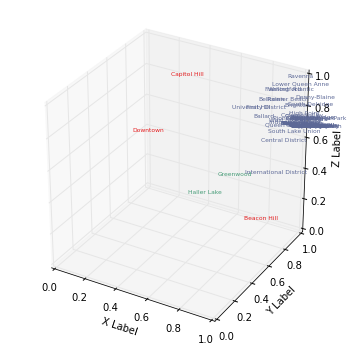

In [64]:
rf.plot_embedding()

In [247]:
client = MongoClient()
db = client['neighborhood_recommender']
collection = db['hood_data' + '_' + city + '_' + state]

hood_zillow = [hood for hood in collection.find()]
df_z = pd.DataFrame(hood_zillow, dtype = np.float64)
names = df_z['name'].values

In [248]:
df_z.drop(['latitude','longitude','id','_id','url', 'city','state', 'name','People Data: Median Household Income','People Data: Average Commute Time (Minutes)','Affordability Data: Median List Price','Affordability Data: Percent Homes Decreasing','Affordability Data: Percent Listing Price Reduction','Affordability Data: Median Sale Price','Affordability Data: Turnover (Sold Within Last Yr)','Affordability Data: Median Condo Value','Affordability Data: Homes Recently Sold','Affordability Data: Homes For Sale','Affordability Data: 1-Yr Change','Affordability Data: Median Value Per Sq Ft','Homes & Real Estate Data: Median Home Size (Sq Ft)','Homes & Real Estate Data: Median Home Size (Sq Ft)','Census Summary-RelationshipStatus: Divorced-Female'], axis = 1, inplace = True)
df_z = df_z.replace(['NA',''], np.nan)
df_z = pd.DataFrame(df_z.values,columns = df_z.columns, dtype = np.float64)


In [249]:
rf_z = ReduceFeatures(df_z, names )
rf_z.preprocessing(100)
rf_z.hcluster_cols(0.3)
rf_z.preprocessing()
df_cz = rf_z.sparse_pca(n_components = 3,alpha = 5)
rf_z.best_cluster()

For n_clusters = 3 The average silhouette_score is : 0.290247916822
For n_clusters = 4 The average silhouette_score is : 0.29241045778
For n_clusters = 5 The average silhouette_score is : 0.312873614227
For n_clusters = 6 The average silhouette_score is : 0.303948181431
For n_clusters = 7 The average silhouette_score is : 0.263282251031
For n_clusters = 8 The average silhouette_score is : 0.275600666465
For n_clusters = 9 The average silhouette_score is : 0.302439154857
For n_clusters = 10 The average silhouette_score is : 0.28778812344


In [254]:
df_cz.sort(1, ascending = False)

df_zf = pd.DataFrame(rf_z.X, index = names).reset_index()
df_zf.columns = ['hood','family vs single','expensiveness', 'Age']


In [255]:
df_zf.to_csv('zillow_pca_data.csv', index = False)

In [252]:
df_cz.sort(3,ascending = False)

,1,2,3
[u'Census Summary-AgeDecade: >=70s' u'People Data: Median Age'],0.000000,0.000000,4.448724
Census Summary-AgeDecade: 60s,0.000000,0.000000,3.305839
Census Summary-RelationshipStatus: Widowed-Female,0.000000,0.000000,2.669771
Census Summary-RelationshipStatus: Widowed-Male,0.000000,0.000000,1.768854
Homes & Real Estate Data: Single-Family Homes,1.870640,0.000000,0.000000
[u'Census Summary-Occupancy: Own'\n u'Census Summary-RelationshipStatus: Married-Female'\n u'Census Summary-RelationshipStatus: Married-Male'\n u'Homes & Real Estate Data: Owners'],4.611083,0.000000,0.000000
Census Summary-AgeDecade: 50s,0.000000,0.000000,0.000000
Census Summary-AgeDecade: 40s,0.000000,0.000000,0.000000
Affordability Data: Median List Price Per Sq Ft,0.000000,0.000000,0.000000
Affordability Data: Property Tax,0.000000,1.454844,0.000000


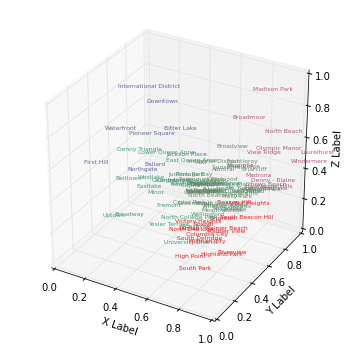

In [253]:
rf_z.plot_embedding()

107

NameError: name 'df_cf' is not defined